In [743]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
import statsmodels

In [744]:
%matplotlib inline

In [745]:
cd Downloads

[Errno 2] No such file or directory: 'Downloads'
/Users/anastasiiaholovachova/Downloads


In [746]:
data = pd.read_csv('my_phone.csv')
data.head()

,Unnamed: 0,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
0,0,842,NO,188,7,2.0,2549,0,1,20,756,1.0
1,1,1021,YES,136,53,3.0,2631,1,0,905,1988,2.0
2,2,563,YES,145,41,5.0,2603,1,0,1263,1716,2.0
3,3,615,YES,131,10,6.0,2769,0,0,1216,1786,2.0
4,4,1821,YES,141,44,2.0,1411,0,0,1208,1212,1.0


In [747]:
data.shape

(4020, 12)

In [748]:
data.describe()

,Unnamed: 0,battery_power,weight,memory,n_cores,ram,wifi,pixel_height,pixel_width,price_range
count,4020.00000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,3020.000000
mean,2009.50000,1127.392289,139.426617,27.362438,3.963930,1715.922637,0.501990,672.843532,1116.360945,1.331126
std,1160.61837,425.790696,33.675572,18.112879,2.220142,1184.300498,0.500058,404.404351,459.694423,0.940227
min,0.00000,500.000000,80.000000,2.000000,1.000000,6.000000,0.000000,0.000000,240.000000,0.000000
25%,1004.75000,780.750000,111.000000,12.000000,2.000000,652.000000,0.000000,364.750000,739.000000,1.000000
50%,2009.50000,983.000000,139.000000,22.000000,4.000000,1489.500000,1.000000,635.000000,1065.500000,1.000000
75%,3014.25000,1489.000000,168.000000,43.000000,6.000000,2746.000000,1.000000,951.000000,1492.250000,2.000000
max,4019.00000,1999.000000,200.000000,64.000000,8.000000,3998.000000,1.000000,1960.000000,1998.000000,3.000000


In [749]:
data.isna().any()

Unnamed: 0       False
battery_power    False
bluetooth        False
weight           False
memory           False
n_cores          False
ram              False
dual_sim         False
wifi             False
pixel_height     False
pixel_width      False
price_range       True
dtype: bool

In [750]:
duplicates = data[data.duplicated()]

In [751]:
duplicates

,Unnamed: 0,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range


In [752]:
#pixel_height = 0
#all boolean values (bluetooth, wifi, dual_sim) have different format
#ram minimum = 6 is too small if ram is provided in megabyes
#mixed value formats in dual_sim column
#Unnamed - not needed


In [753]:
data = data[['battery_power', 'bluetooth', 'weight', 'memory', 'n_cores', 'ram', 'dual_sim','wifi','pixel_height', 'pixel_width', 'price_range']]

In [754]:
data.loc[data['pixel_height']<=0]

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
1481,1834,NO,99,40,4.0,3692,0,0,0,1987,3.0
1933,897,YES,154,2,8.0,1958,0,0,0,994,1.0
2420,986,NO,80,26,8.0,1316,0,0,0,1214,NaN
2819,1992,YES,153,43,5.0,2179,1,0,0,883,NaN


/tmp/ipykernel_68259/446120712.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_coef = data.corr()


<Axes: >

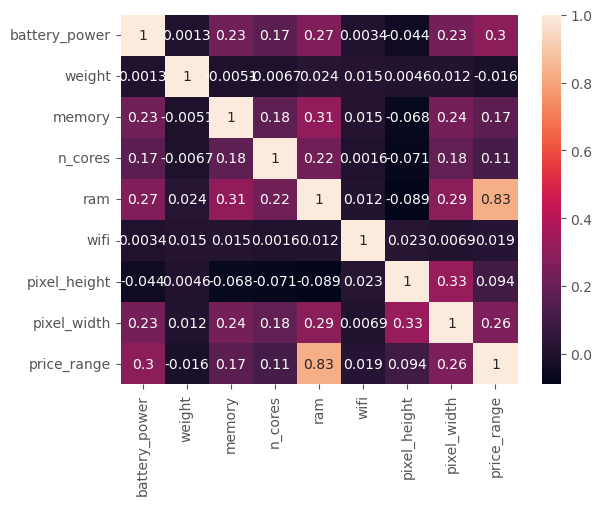

In [755]:
cor_coef = data.corr()
sns.heatmap(cor_coef, annot = True)

In [756]:
data['pixel_height'].replace(0, np.nan, inplace=True)

In [757]:
data.describe()

,battery_power,weight,memory,n_cores,ram,wifi,pixel_height,pixel_width,price_range
count,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4016.000000,4020.000000,3020.000000
mean,1127.392289,139.426617,27.362438,3.963930,1715.922637,0.501990,673.513695,1116.360945,1.331126
std,425.790696,33.675572,18.112879,2.220142,1184.300498,0.500058,404.047442,459.694423,0.940227
min,500.000000,80.000000,2.000000,1.000000,6.000000,0.000000,1.000000,240.000000,0.000000
25%,780.750000,111.000000,12.000000,2.000000,652.000000,0.000000,366.000000,739.000000,1.000000
50%,983.000000,139.000000,22.000000,4.000000,1489.500000,1.000000,635.000000,1065.500000,1.000000
75%,1489.000000,168.000000,43.000000,6.000000,2746.000000,1.000000,951.000000,1492.250000,2.000000
max,1999.000000,200.000000,64.000000,8.000000,3998.000000,1.000000,1960.000000,1998.000000,3.000000


In [758]:
data.loc[data['pixel_height']<=200]

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
0,842,NO,188,7,2.0,2549,0,1,20.0,756,1.0
11,1520,YES,177,33,8.0,3826,0,1,151.0,1005,3.0
28,1453,NO,96,52,2.0,2373,1,1,187.0,1311,2.0
32,1319,YES,107,41,1.0,2227,0,1,85.0,1152,1.0
33,1310,YES,100,51,4.0,3845,1,0,178.0,1919,3.0
...,...,...,...,...,...,...,...,...,...,...,...
2971,1207,NO,141,56,6.0,2293,1,0,93.0,560,NaN
2978,1489,NO,197,60,7.0,677,1,1,7.0,719,NaN
2991,1797,YES,174,42,3.0,3359,0,1,57.0,1169,NaN
2998,1533,YES,171,50,2.0,2509,1,0,38.0,832,NaN


In [759]:
#pixel_height values too low

In [760]:
data.loc[data.pixel_height.between(0, 200), 'pixel_height'] = np.nan

In [761]:
data.describe()

,battery_power,weight,memory,n_cores,ram,wifi,pixel_height,pixel_width,price_range
count,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,3475.000000,4020.000000,3020.000000
mean,1127.392289,139.426617,27.362438,3.963930,1715.922637,0.501990,761.799424,1116.360945,1.331126
std,425.790696,33.675572,18.112879,2.220142,1184.300498,0.500058,360.960283,459.694423,0.940227
min,500.000000,80.000000,2.000000,1.000000,6.000000,0.000000,201.000000,240.000000,0.000000
25%,780.750000,111.000000,12.000000,2.000000,652.000000,0.000000,472.000000,739.000000,1.000000
50%,983.000000,139.000000,22.000000,4.000000,1489.500000,1.000000,715.000000,1065.500000,1.000000
75%,1489.000000,168.000000,43.000000,6.000000,2746.000000,1.000000,1001.000000,1492.250000,2.000000
max,1999.000000,200.000000,64.000000,8.000000,3998.000000,1.000000,1960.000000,1998.000000,3.000000


In [762]:
data['pixel_height'] = data['pixel_height'].fillna(data['pixel_height'].mean())

In [763]:
data.describe()

,battery_power,weight,memory,n_cores,ram,wifi,pixel_height,pixel_width,price_range
count,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,3020.000000
mean,1127.392289,139.426617,27.362438,3.963930,1715.922637,0.501990,761.799424,1116.360945,1.331126
std,425.790696,33.675572,18.112879,2.220142,1184.300498,0.500058,335.594877,459.694423,0.940227
min,500.000000,80.000000,2.000000,1.000000,6.000000,0.000000,201.000000,240.000000,0.000000
25%,780.750000,111.000000,12.000000,2.000000,652.000000,0.000000,503.000000,739.000000,1.000000
50%,983.000000,139.000000,22.000000,4.000000,1489.500000,1.000000,761.799424,1065.500000,1.000000
75%,1489.000000,168.000000,43.000000,6.000000,2746.000000,1.000000,951.000000,1492.250000,2.000000
max,1999.000000,200.000000,64.000000,8.000000,3998.000000,1.000000,1960.000000,1998.000000,3.000000


In [764]:
data['bluetooth'].replace('YES', 1, inplace=True)

In [765]:
data['bluetooth'].replace('NO', 0, inplace=True)

In [766]:
data['dual_sim'].replace('YES', 1, inplace=True)
data['dual_sim'].replace('NO', 0, inplace=True)
data['dual_sim'] = data['dual_sim'].astype(int)

In [767]:
data.describe()

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
count,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000,3020.000000
mean,1127.392289,0.374627,139.426617,27.362438,3.963930,1715.922637,0.507214,0.501990,761.799424,1116.360945,1.331126
std,425.790696,0.484087,33.675572,18.112879,2.220142,1184.300498,0.500010,0.500058,335.594877,459.694423,0.940227
min,500.000000,0.000000,80.000000,2.000000,1.000000,6.000000,0.000000,0.000000,201.000000,240.000000,0.000000
25%,780.750000,0.000000,111.000000,12.000000,2.000000,652.000000,0.000000,0.000000,503.000000,739.000000,1.000000
50%,983.000000,0.000000,139.000000,22.000000,4.000000,1489.500000,1.000000,1.000000,761.799424,1065.500000,1.000000
75%,1489.000000,1.000000,168.000000,43.000000,6.000000,2746.000000,1.000000,1.000000,951.000000,1492.250000,2.000000
max,1999.000000,1.000000,200.000000,64.000000,8.000000,3998.000000,1.000000,1.000000,1960.000000,1998.000000,3.000000


In [768]:
data.loc[data['ram']<25]

,battery_power,bluetooth,weight,memory,n_cores,ram,dual_sim,wifi,pixel_height,pixel_width,price_range
3041,777,0,114,16,3.0,12,1,1,406.0,916,1.0
3065,800,0,124,7,4.0,6,0,0,784.0,515,1.0
3206,790,0,162,17,2.0,18,0,1,763.0,543,1.0
3234,804,0,137,15,2.0,22,0,0,670.0,338,1.0
3276,799,0,161,9,3.0,12,1,1,579.0,667,1.0
3306,806,0,107,13,4.0,8,1,1,938.0,959,1.0
3534,767,0,114,15,3.0,18,1,1,650.0,725,1.0
3593,756,0,161,16,2.0,18,0,1,979.0,780,1.0
3601,794,0,185,9,3.0,21,0,0,395.0,1150,1.0
3616,784,0,111,12,2.0,10,1,1,594.0,450,1.0


In [769]:
data.loc[data.ram.between(0, 25), 'ram'] = np.nan

In [770]:
data['ram'] = data['ram'].fillna(data['ram'].min())

In [771]:
data = data.dropna()

In [772]:
def EDA(data):
    total_na = data.isna().sum().sum()
    print("Dimensions : %d rows, %d columns" % (data.shape[0], data.shape[1]))
    print("Total NA Values : %d " % (total_na))
    print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "Count Distinct", "NA Values"))
    col_name = data.columns
    dtypes = data.dtypes
    uniq = data.nunique()
    na_val = data.isna().sum()
    for i in range(len(data.columns)):
        print("%38s %10s   %10s %10s" % (col_name[i], dtypes[i], uniq[i], na_val[i]))

EDA(data)

Dimensions : 3020 rows, 11 columns
Total NA Values : 0 
                           Column Name  Data Type     Count Distinct  NA Values
                         battery_power      int64         1123          0
                             bluetooth      int64            2          0
                                weight      int64          121          0
                                memory      int64           63          0
                               n_cores    float64            9          0
                                   ram    float64         1990          0
                              dual_sim      int64            2          0
                                  wifi      int64            2          0
                          pixel_height    float64         1119          0
                           pixel_width      int64         1401          0
                           price_range    float64            4          0


In [773]:
continuous_variables = ['battery_power','weight','memory','n_cores','ram','pixel_height', 'pixel_width']
categorical_variables = ['bluetooth','dual_sim','wifi','price_range']


In [774]:
for variable in categorical_variables:
    print(data[variable].value_counts()/float(len(data)))

0    0.672185
1    0.327815
Name: bluetooth, dtype: float64
1    0.503974
0    0.496026
Name: dual_sim, dtype: float64
1    0.500331
0    0.499669
Name: wifi, dtype: float64
1.0    0.503311
2.0    0.165563
3.0    0.165563
0.0    0.165563
Name: price_range, dtype: float64


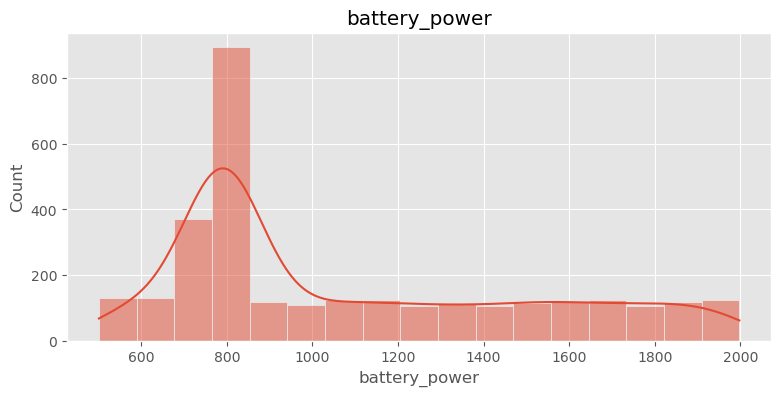

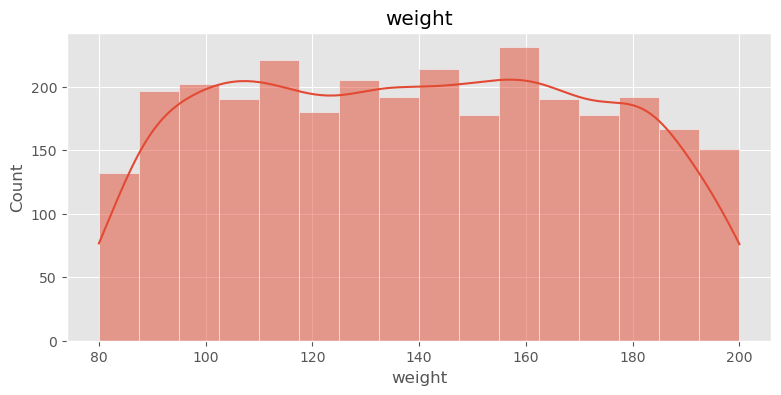

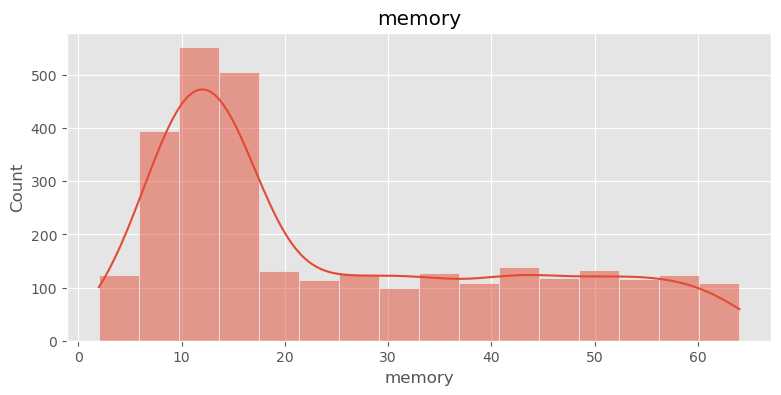

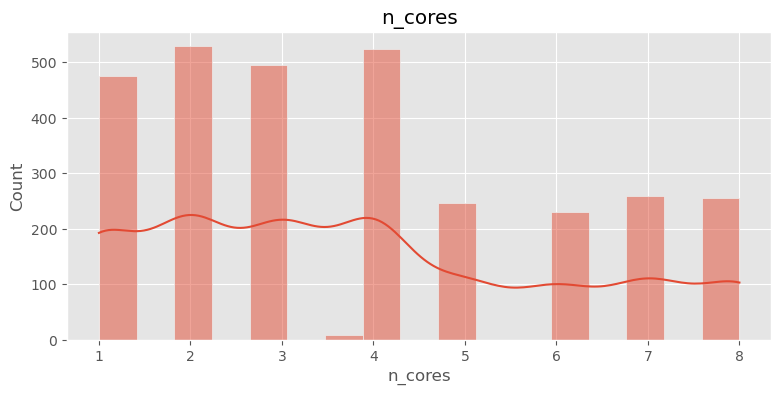

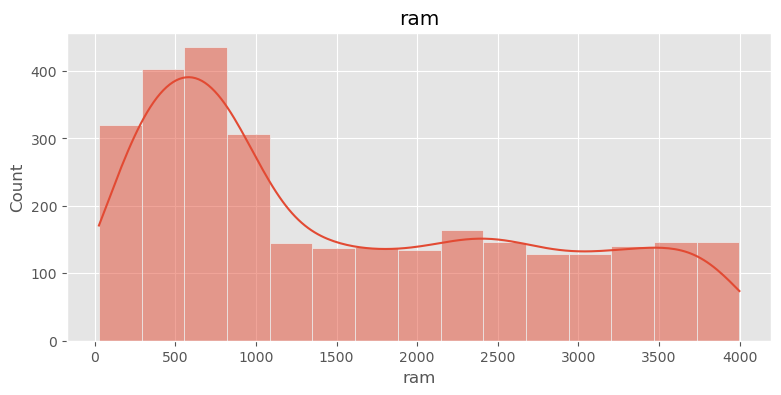

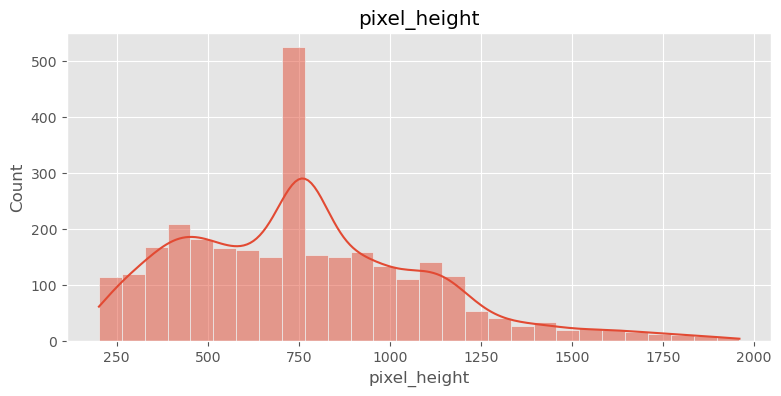

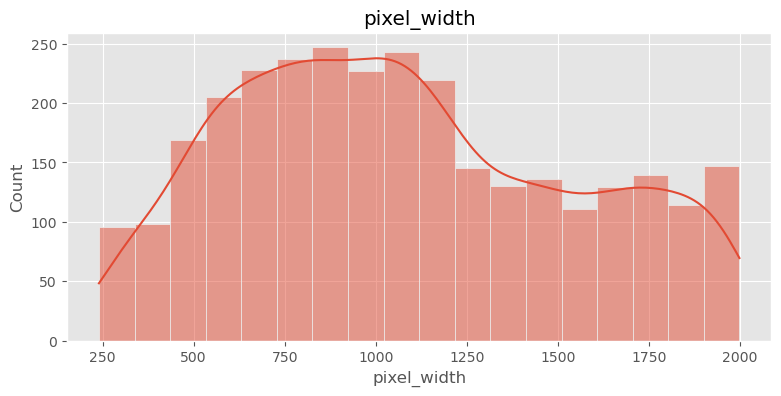

In [775]:
numerical = data.select_dtypes(include=np.number)
plt.style.use("ggplot")
for column in continuous_variables:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.histplot(data[column], kde=True)
    plt.title(column)

In [776]:
data.loc[data.n_cores.between(3.1, 3.9),'n_cores']=4

In [777]:
data.drop(columns = ['weight', 'n_cores', 'pixel_width'], axis = 1, inplace = True)

In [778]:
lower_boundries= []
upper_boundries= []
for i in ['battery_power','memory','ram','pixel_height']:
    IQR= data[i].quantile(0.75) - data[i].quantile(0.25)
    lower_bound = data[i].quantile(0.25)
    upper_bound = data[i].quantile(0.75)
    
    print(i, ":", lower_bound, ",",  upper_bound)
    
    lower_boundries.append(lower_bound)
    upper_boundries.append(upper_bound)

battery_power : 775.0 , 1429.0
memory : 11.0 , 40.0
ram : 577.0 , 2563.0
pixel_height : 501.0 , 958.5


In [779]:
X = data.drop(['price_range'], axis=1)

Y = data['price_range']

In [780]:
from sklearn.model_selection import train_test_split

X_train, X_rem, Y_train, Y_rem = train_test_split(X,Y, train_size=0.8)

test_size = 0.5
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem,Y_rem, test_size=0.5)

In [781]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [782]:
import tensorflow as tf
from tensorflow import keras

In [783]:
Y_train.shape

(2416,)

In [784]:
X_train.shape

(2416, 7)

In [785]:
from tensorflow import keras

In [786]:
model = keras.Sequential()

input_layer = keras.layers.Dense(4, input_shape = [7], activation = 'relu')
model.add(input_layer)

hidden_layer_1 = keras. layers.Dense(16, activation = 'relu')
model.add(hidden_layer_1)

hidden_layer_2 = keras. layers.Dense(32, activation = 'relu')
model.add(hidden_layer_2)

hidden_layer_3 = keras. layers.Dense(64, activation = 'relu')
model.add(hidden_layer_3)

hidden_layer_4 = keras. layers.Dense(64, activation = 'relu')
model.add(hidden_layer_4)

hidden_layer_5 = keras. layers.Dense(64, activation = 'relu')
model.add(hidden_layer_5)



output_layer = keras.layers.Dense(1, activation = 'relu')
model.add(output_layer)

In [787]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [788]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

In [789]:
history = model.fit(X_train, Y_train,
                   epochs = 150000,
                   steps_per_epoch = 100,
                   validation_split = 0.25,
                   batch_size = 42,
                   callbacks = [early_stopping])

Epoch 1/150000
100/100 [==============================] - 1s 3ms/step - loss: -4.9723 - accuracy: 0.5027 - val_loss: -5.3776 - val_accuracy: 0.5166
Epoch 2/150000
100/100 [==============================] - 0s 2ms/step - loss: -5.0018 - accuracy: 0.5068 - val_loss: -5.3776 - val_accuracy: 0.5166


In [790]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test score', loss)
print('Test accuracy', accuracy)

10/10 [==============================] - 0s 1ms/step - loss: -5.0999 - accuracy: 0.5000
Test score -5.099911212921143
Test accuracy 0.5


In [ ]:
#accuracy started decreasing ater 5 hidden layers